# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

In this notebook, We are going to do a project with BeautifulSoup to Webscrapping data from https://www.exchange-rates.org/history/IDR/USD/T. In this project, we will analyze the exchange rates of Indonesian Rupiahs (IDR) per US Dollar (USD).

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify())[:1045]

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.n

TypeError: 'NoneType' object is not subscriptable

## Finding the right key to scrap the data & Extracting the right information

In this section we try to find the right key to scrap the data & extracting the right information. Using inpect elemnt on the website, We can find which is the right key to scrap the data that we needed.

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])


table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/5/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-5-2021">
     14,292.17893
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-5-2021">
     USD IDR rate for 3/5/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3


In [6]:
td = table.find_all('td')
td[:4]

[<td>3/5/2021</td>,
 <td>Friday</td>,
 <td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td>]

In [7]:
tr = table.find_all('tr')
tr[:4]

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>]

After finding the right key, we can use a loop to append the selected rows from the needed columns to create a data frame (we using a loop because soup can only assign one row at a time). However, on rows 11 and 35 there are 'td' that contain css codes that we don't need. So we can just skip the rows and continue with the other rows. After the correct rows have been assigned, we can swap the position of data from the oldest to the newest.

In [8]:
temp = [] #initiating a tuple


for i in range(0, len(tr)):
    
    if(i == 12) :
        continue
        
    if(i == 36):
        continue
    
    
    row = table.find_all('tr')[i]
 
    #get date
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    #get currency
    harga_harian = row.find_all('td')[2].text
    harga_harian = harga_harian.strip()
    
    #get 
    temp.append((harga_harian,tanggal))
temp = temp[::-1] 
temp

[('14,754.95155 IDR', '9/6/2020'),
 ('14,743.92989 IDR', '9/7/2020'),
 ('14,839.54267 IDR', '9/8/2020'),
 ('14,783.50009 IDR', '9/9/2020'),
 ('14,871.58664 IDR', '9/10/2020'),
 ('14,865.27553 IDR', '9/11/2020'),
 ('14,876.45021 IDR', '9/13/2020'),
 ('14,864.65988 IDR', '9/14/2020'),
 ('14,843.44670 IDR', '9/15/2020'),
 ('14,807.88761 IDR', '9/16/2020'),
 ('14,829.41738 IDR', '9/17/2020'),
 ('14,730.71792 IDR', '9/18/2020'),
 ('14,728.84529 IDR', '9/20/2020'),
 ('14,701.43420 IDR', '9/21/2020'),
 ('14,751.85786 IDR', '9/22/2020'),
 ('14,825.54899 IDR', '9/23/2020'),
 ('14,888.78607 IDR', '9/24/2020'),
 ('14,855.63943 IDR', '9/25/2020'),
 ('14,859.98349 IDR', '9/27/2020'),
 ('14,892.32194 IDR', '9/28/2020'),
 ('14,880.93210 IDR', '9/29/2020'),
 ('14,867.44686 IDR', '9/30/2020'),
 ('14,822.66605 IDR', '10/1/2020'),
 ('14,852.30483 IDR', '10/2/2020'),
 ('14,797.90178 IDR', '10/5/2020'),
 ('14,857.67854 IDR', '10/6/2020'),
 ('14,705.58246 IDR', '10/7/2020'),
 ('14,692.93025 IDR', '10/8/2020

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns=('harga_harian', 'tanggal'))
df.head()

,harga_harian,tanggal
0,"14,754.95155 IDR",9/6/2020
1,"14,743.92989 IDR",9/7/2020
2,"14,839.54267 IDR",9/8/2020
3,"14,783.50009 IDR",9/9/2020
4,"14,871.58664 IDR",9/10/2020


After putting the array into dataframe, We can replace the unnecessary string and transform the data into its respective data types. Check if there are any missing values and rounding the 2 numbers before comma. We also figure out how much the data, its average, standard deviation, maximum, minimum, and its quartile.

In [10]:
df['harga_harian'] = df['harga_harian'].str.replace(' IDR','')
df['harga_harian'] = df['harga_harian'].str.replace(',','')
df['harga_harian'] = df['harga_harian'].astype('float64')
df['tanggal'] = df['tanggal'].astype('datetime64')

In [11]:
df[df.isna().any(axis=1)]

,harga_harian,tanggal


In [12]:
df.dtypes

harga_harian           float64
tanggal         datetime64[ns]
dtype: object

In [13]:
df['harga_harian'] = df['harga_harian'].round(2)
df

,harga_harian,tanggal
0,14754.95,2020-09-06
1,14743.93,2020-09-07
2,14839.54,2020-09-08
3,14783.50,2020-09-09
4,14871.59,2020-09-10
...,...,...
129,14248.61,2021-03-01
130,14256.28,2021-03-02
131,14257.29,2021-03-03
132,14261.85,2021-03-04


In [17]:
df['harga_harian'].describe().round(2)

count      134.00
mean     14321.85
std        329.18
min      13861.51
25%      14067.74
50%      14140.53
75%      14685.33
max      14892.32
Name: harga_harian, dtype: float64

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Import matplotlib library to do data visualization. Use the date as the x-axis, exchange-rates as the y-axis and describe method as the legend of the plot.

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 1440x720 with 0 Axes>

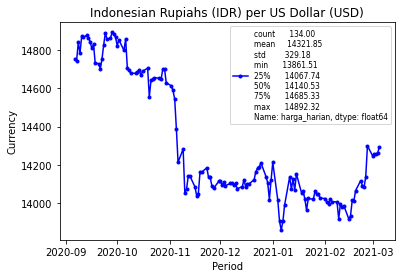

<Figure size 1440x720 with 0 Axes>

In [16]:
x = df['tanggal']
y = df['harga_harian']
plt.plot(x, y, marker='.', linestyle='-', color='b',label=df['harga_harian'].describe().round(2))
plt.xlabel('Period')
plt.ylabel('Currency') 
plt.title('Indonesian Rupiahs (IDR) per US Dollar (USD)') 
plt.legend( prop={'size': 7.5})
plt.figure(figsize=(20,10))

Based on the line chart, the exchange rates from IDR to USD is decreasing which is good for for Indonesia. The value reached its minimum on January 2021 around new year. It means that Indonesian Rupiahs is getting stronger but it is still uncertain because in the end of the chart, the line is rising up again.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.